# Exploratory Data Analysis 
## Lung Cancer in Singapore

Importing relevant packages into Jupyter Notebook

In [113]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing data from data/lung_cancer.db and previewing data

In [114]:
# Connect to the database
conn = sqlite3.connect('data/lung_cancer.db')

# Query to get a list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and load the result into a DataFrame
tables_df = pd.read_sql_query(tables_query, conn)

# Display the list of tables
print(tables_df)

          name
0  lung_cancer


In [115]:
# Example query with actual table name
query = "SELECT * FROM lung_cancer"

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
print(df.head())

# Close the connection
conn.close()

             ID  Age Gender COPD History Genetic Markers  \
0  1.468154e+16   42   Male           No     Not Present   
1  1.271684e+18   72   Male          Yes     Not Present   
2  1.708068e+18   65   Male          Yes     Not Present   
3  3.555829e+17   67   Male           No     Not Present   
4  1.684598e+18   54   Male          Yes     Not Present   

  Air Pollution Exposure  Last Weight  Current Weight Start Smoking  \
0                 Medium           73              69          2015   
1                   High           50              42          2006   
2                    Low           65              75          1998   
3                   High           69              58          2011   
4                 Medium           46              40          1994   

    Stop Smoking Taken Bronchodilators Frequency of Tiredness Dominant Hand  \
0           2020                    No             None / Low         Right   
1           2012                   Yes                

## High Level Data Overview
Here we are using the .info() method to get a quick overview of the columns, how many data entries there are, what the data type of each column is, and where there are missing values. 

Additionally, we are using the .describe() method to attain descriptive statistics of the numerical columns. 

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

## Data Cleaning 
- removing duplicate rows 
- removing missing values (<5% of data)
- converting data types 
- fix inconsistent data

In [61]:
# Drop duplicate rows 
df_clean = df_clean.drop_duplicates()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9997 non-null   float64
 1   Age                     9997 non-null   int64  
 2   Gender                  9997 non-null   object 
 3   COPD History            8916 non-null   object 
 4   Genetic Markers         9997 non-null   object 
 5   Air Pollution Exposure  9994 non-null   object 
 6   Last Weight             9997 non-null   int64  
 7   Current Weight          9997 non-null   int64  
 8   Start Smoking           9997 non-null   object 
 9   Stop Smoking            9997 non-null   object 
 10  Taken Bronchodilators   8970 non-null   object 
 11  Frequency of Tiredness  9997 non-null   object 
 12  Dominant Hand           9997 non-null   object 
 13  Lung Cancer Occurrence  9997 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usa

In [62]:
# Missing values overview
print(df_clean.isna().sum())

ID                           0
Age                          0
Gender                       0
COPD History              1081
Genetic Markers              0
Air Pollution Exposure       3
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1027
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64


In [63]:
# Drop missing values (5% or less of total values)
threshold = len(df) * 0.05 
cols_to_drop = df_clean.columns[df_clean.isna().sum() <= threshold]
df_clean = df_clean.dropna(subset = cols_to_drop)

print(df_clean.isna().sum())

ID                           0
Age                          0
Gender                       0
COPD History              1080
Genetic Markers              0
Air Pollution Exposure       0
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1026
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64


In [81]:
# Convert inconsistent data types

# Convert 'ID' column to float
df_clean['ID'] = df_clean['ID'].astype('int64')

In [77]:
# Fix inconsistent data 

# Convert all strings to lowercase 
df_clean = df_clean.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Remove rows with 'nan' values from Gender column
df_clean = df_clean.drop(df_clean[df_clean['Gender'].str.contains('nan', na = False)].index)
print(df_clean['Gender'].unique())

['male' 'female']


In [82]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      9994 non-null   int64 
 1   Age                     9994 non-null   int64 
 2   Gender                  9994 non-null   object
 3   COPD History            9994 non-null   object
 4   Genetic Markers         9994 non-null   object
 5   Air Pollution Exposure  9994 non-null   object
 6   Last Weight             9994 non-null   int64 
 7   Current Weight          9994 non-null   int64 
 8   Start Smoking           9994 non-null   object
 9   Stop Smoking            9994 non-null   object
 10  Taken Bronchodilators   9994 non-null   object
 11  Frequency of Tiredness  9994 non-null   object
 12  Dominant Hand           9994 non-null   object
 13  Lung Cancer Occurrence  9994 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB
None


## Feature Engineering 
- impute missing values 
- encode categorical values 
- normalise / standardise numeric variables 
- transform skewed variables 
- handling outliers 

In [83]:
# Impute missing values for 'COPD History' and 'Taken Bronchodilators' 
# NaN values are converted into 'no'

df_clean.fillna('no', inplace = True)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      9994 non-null   int64 
 1   Age                     9994 non-null   int64 
 2   Gender                  9994 non-null   object
 3   COPD History            9994 non-null   object
 4   Genetic Markers         9994 non-null   object
 5   Air Pollution Exposure  9994 non-null   object
 6   Last Weight             9994 non-null   int64 
 7   Current Weight          9994 non-null   int64 
 8   Start Smoking           9994 non-null   object
 9   Stop Smoking            9994 non-null   object
 10  Taken Bronchodilators   9994 non-null   object
 11  Frequency of Tiredness  9994 non-null   object
 12  Dominant Hand           9994 non-null   object
 13  Lung Cancer Occurrence  9994 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB
None


In [152]:
# Encode categorical values 

# Encoding 'Gender' column to 'Male' 
df_clean['Male'] = df_clean['Gender'].apply(lambda val:1 if val == 'male' else 0)

# Encoding 'COPD History' column 
df_clean['COPDHistory'] = df_clean['COPD History'].apply(lambda val:1 if val == 'yes' else 0)

# Encoding 'Genetic Markers' column 
df_clean['GeneticMarkers'] = df_clean['Genetic Markers'].apply(lambda val:1 if val == 'present' else 0)

# Encoding 'Air Pollution Exposure' column 
ape_mapping = {'low':0, 'medium':1, 'high':2}
df_clean['AirPollutionExposure'] = df_clean['Air Pollution Exposure'].map(ape_mapping)

# Encoding 'Taken Bronchodilators' column 
df_clean['TakenBronchodilators'] = df_clean['Taken Bronchodilators'].apply(lambda val:1 if val == 'yes' else 0)

# Encoding 'Frequency of Tiredness' column 
fot_mapping = {'none / low':0, 'medium':1, 'high':2}
df_clean['Tiredness'] = df_clean['Frequency of Tiredness'].map(fot_mapping)

# Encoding 'Dominant Hand' column
df_clean['Right Handed'] = df_clean['Dominant Hand'].apply(lambda val:0 if val == 'left' else 1)

In [221]:
# Transforming numeric values 

# Transforming 'Last Weight' and 'Current Weight' into 'Weight Change' 
df_clean['Weight Change'] = df_clean['Current Weight'] - df_clean['Last Weight']

# Encoding 'Start Smoking' column to 'Smoker'
df_clean['Smoker'] = df_clean['Start Smoking'].apply(lambda val:0 if val == 'not applicable' else 1)

# Transforming 'still_smoking' in 'Stop Smoking' column into '2024'
# 2024 is most recent value in 'Stop Smoking' column
df_clean['Stop Smoking 2'] = df_clean['Stop Smoking'].apply(lambda val:2024 if val == 'still smoking' else val)

# Transforming 'not applicable' in 'Start Smoking' and 'Stop Smoking' to 0
df_clean['Stop Smoking 2'] = df_clean['Stop Smoking 2'].apply(lambda val:0 if val == 'not applicable' else val)
df_clean['Start Smoking 2'] = df_clean['Start Smoking'].apply(lambda val:0 if val == 'not applicable' else val)

# Transforming 'Start Smoking' and 'Stop Smoking' into 'Years Smoking'
df_clean['Start Smoking 2'] = df_clean['Start Smoking 2'].astype('int64')
df_clean['Stop Smoking 2'] = df_clean['Stop Smoking 2'].astype('int64')
df_clean['Years Smoking'] = df_clean['Stop Smoking 2'] - df_clean['Start Smoking 2']

df_clean

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,...,AirPollutionExposure,Weight Change,Smoker,Stop Smoking 2,Start Smoking 2,Years Smoking,TakenBronchodilators,Tiredness,Right Handed,Age New
0,-2147483648,42,male,no,not present,medium,73,69,2015,2020,...,1,-4,1,2020,2015,5,0,0,1,42
1,-2147483648,72,male,yes,not present,high,50,42,2006,2012,...,2,-8,1,2012,2006,6,1,1,1,72
2,-2147483648,65,male,yes,not present,low,65,75,1998,still smoking,...,0,10,1,2024,1998,26,1,0,1,65
3,-2147483648,67,male,no,not present,high,69,58,2011,2014,...,2,-11,1,2014,2011,3,0,0,1,67
4,-2147483648,54,male,yes,not present,medium,46,40,1994,2017,...,1,-6,1,2017,1994,23,1,0,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-2147483648,59,female,yes,present,medium,56,46,1984,1998,...,1,-10,1,1998,1984,14,1,0,0,59
9994,-2147483648,76,female,yes,present,high,90,78,1967,1997,...,2,-12,1,1997,1967,30,1,2,1,76
9995,-2147483648,57,female,yes,present,high,63,62,2007,still smoking,...,2,-1,1,2024,2007,17,1,2,1,57
9996,-2147483648,74,female,yes,not present,high,87,77,not applicable,not applicable,...,2,-10,0,0,0,0,1,0,1,74


In [ ]:
# Normalise/standardise numeric variables 

# Transform skewed variables 

In [192]:
# Handling outliers 

# 'Weight Change' column 
# Identifying 25th and 75th percentile 
weightchange_25 = df_clean['Weight Change'].quantile(0.25)
weightchange_75 = df_clean['Weight Change'].quantile(0.75)
weightchange_iqr = weightchange_75 - weightchange_25 

# Identifying thresholds 
wc_lower = weightchange_25 - (1.5 * weightchange_iqr)
wc_upper = weightchange_75 + (1.5 * weightchange_iqr)
print(wc_lower, wc_upper)

# 'Years Smoking' column
# Identifying 25th and 75th percentile 
yearssmoking_25 = df_clean['Years Smoking'].quantile(0.25)
yearssmoking_75 = df_clean['Years Smoking'].quantile(0.75)
yearssmoking_iqr = yearssmoking_75 - yearssmoking_25 

# Identifying thresholds 
ys_lower = yearssmoking_25 - (1.5 * yearssmoking_iqr)
ys_upper = yearssmoking_75 + (1.5 * yearssmoking_iqr)

print(ys_lower, ys_upper)
df_clean[(df_clean['Years Smoking'] < ys_lower) | 
         (df_clean['Years Smoking'] > ys_upper)][['ID', 'Age','Start Smoking', 
                                                  'Stop Smoking','Years Smoking',
                                                  'Lung Cancer Occurrence']]

-23.0 17.0
-33.0 63.0


,ID,Age,Start Smoking,Stop Smoking,Years Smoking,Lung Cancer Occurrence
128,-2147483648,89,1953,still smoking,69,1
139,-2147483648,89,1958,still smoking,64,1
142,-2147483648,85,1940,2012,72,1
277,-2147483648,75,1956,still smoking,66,1
281,-2147483648,89,1939,still smoking,83,1
...,...,...,...,...,...,...
9540,-2147483648,73,1956,still smoking,66,0
9707,-2147483648,89,1937,2012,75,1
9823,-2147483648,107,1946,still smoking,76,0
9839,-2147483648,70,1955,still smoking,67,1


In [224]:
# Handling outliers
# The dataset features rows where the 'Age' column is negative 
# This could be an input error, hence these values are changed to positive

df_clean['Age New'] = df_clean['Age'].apply(lambda val:-val if val <0 else val)

# 'Age New' column
# Identifying 25th and 75th percentile 
age_25 = df_clean['Age New'].quantile(0.25)
age_75 = df_clean['Age New'].quantile(0.75)
age_iqr = age_75 - age_25 

# Identifying thresholds 
age_lower = age_25 - (1.5 * age_iqr)
age_upper = age_75 + (1.5 * age_iqr)
print(age_lower, age_upper)

df_clean[(df_clean['Age New'] < age_lower) | 
         (df_clean['Age New'] > age_upper)][['ID', 'Age','Start Smoking', 
                                                  'Stop Smoking','Years Smoking',
                                                  'Lung Cancer Occurrence']]

24.0 104.0


,ID,Age,Start Smoking,Stop Smoking,Years Smoking,Lung Cancer Occurrence
51,-2147483648,110,not applicable,not applicable,0,1
60,-2147483648,18,2023,still smoking,1,0
182,-2147483648,22,2007,still smoking,17,0
205,-2147483648,21,2013,still smoking,11,1
434,-2147483648,22,2003,still smoking,21,0
465,-2147483648,21,2012,still smoking,12,1
920,-2147483648,106,not applicable,not applicable,0,1
1141,-2147483648,105,not applicable,not applicable,0,1
1284,-2147483648,108,not applicable,not applicable,0,1
1287,-2147483648,20,2021,still smoking,3,0


## Data Visualisation 
- correlation heatmap 
- box plots 
- scatter plots 
- pair plot 
- .describe() 

In [201]:
print(df_clean.columns)

Index(['ID', 'Age', 'Gender', 'COPD History', 'Genetic Markers',
       'Air Pollution Exposure', 'Last Weight', 'Current Weight',
       'Start Smoking', 'Stop Smoking', 'Taken Bronchodilators',
       'Frequency of Tiredness', 'Dominant Hand', 'Lung Cancer Occurrence',
       'Male', 'COPD', 'COPDHist', 'COPDHistory', 'GeneticMarkers',
       'AirPollutionExposure', 'Weight Change', 'Smoker', 'Stop Smoking 2',
       'Start Smoking 2', 'Years Smoking', 'TakenBronchodilators', 'Tiredness',
       'Right Handed', 'Age New'],
      dtype='object')


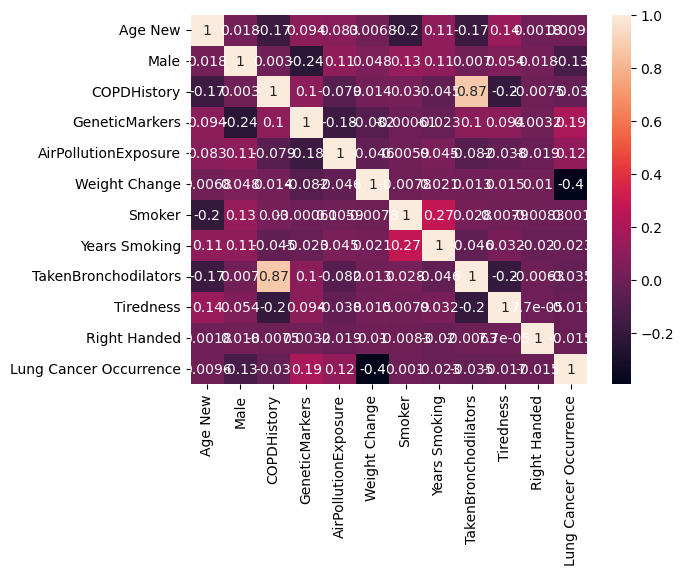

In [225]:
# Correlation Heatmap
numerical_features = ['Age New', 'Male', 'COPDHistory', 'GeneticMarkers', 
                      'AirPollutionExposure', 'Weight Change', 'Smoker', 
                      'Years Smoking', 'TakenBronchodilators', 'Tiredness', 
                      'Right Handed', 'Lung Cancer Occurrence']

sns.heatmap(df_clean[numerical_features].corr(), annot = True)
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


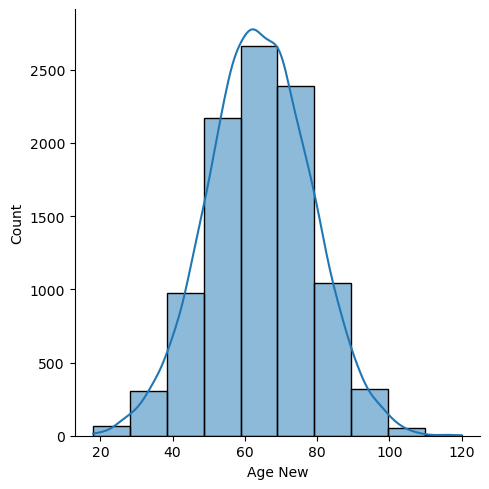

In [227]:
# Distribution plot of 'Age New' 
sns.displot(df_clean['Age New'], kde = True, bins = 10)
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


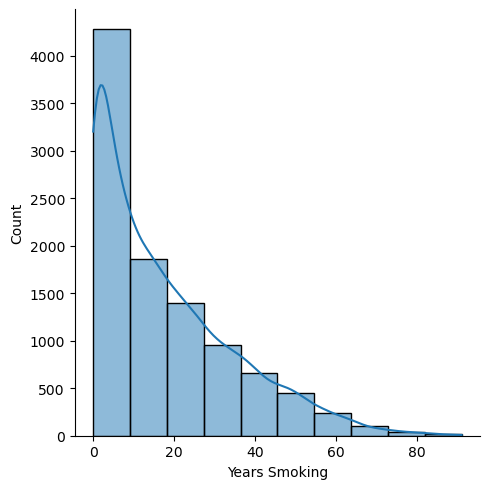

In [226]:
# Distribution plot of 'Years Smoking'
sns.displot(df_clean['Years Smoking'], kde = True, bins = 10)
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


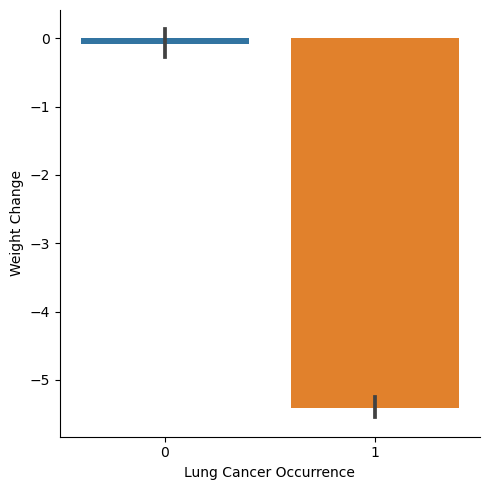

In [230]:
# Bar chart showing the relationship between 'Lung Cancer Occurrence' 
# and 'Weight Change' 
sns.catplot(x = 'Lung Cancer Occurrence', y = 'Weight Change', data = df_clean, kind = 'bar')
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


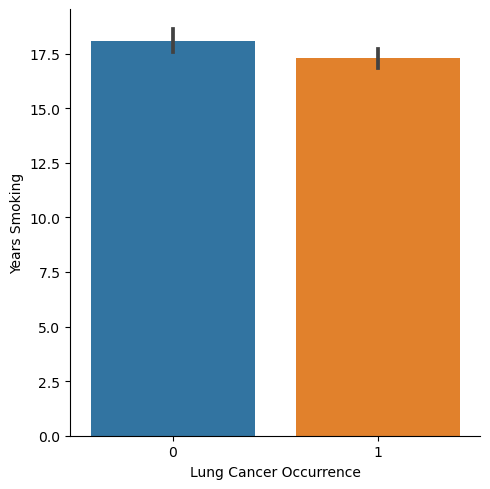

In [231]:
# Bar chart showing the relationship between 'Lung Cancer Occurrence' 
# and 'Years Smoking'
sns.catplot(x = 'Lung Cancer Occurrence', y = 'Years Smoking', data = df_clean, kind = 'bar')
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


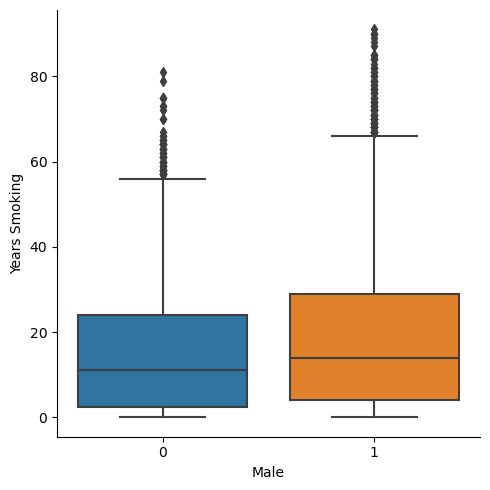

In [232]:
# Box plot showing the relationship betwen 'Male' and 'Years Smoking'
g = sns.catplot(x = 'Male', y= 'Years Smoking', data = df_clean, kind = 'box')
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


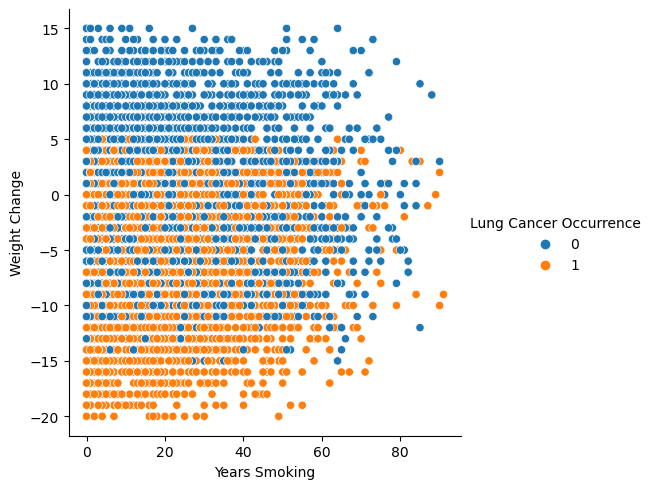

In [233]:
# Scatter plot showing the relationship between 'Years Smoking' 
# and 'Weight Change'
sns.relplot(x = 'Years Smoking', y = 'Weight Change', data = df_clean, 
            kind = 'scatter', hue = 'Lung Cancer Occurrence')
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


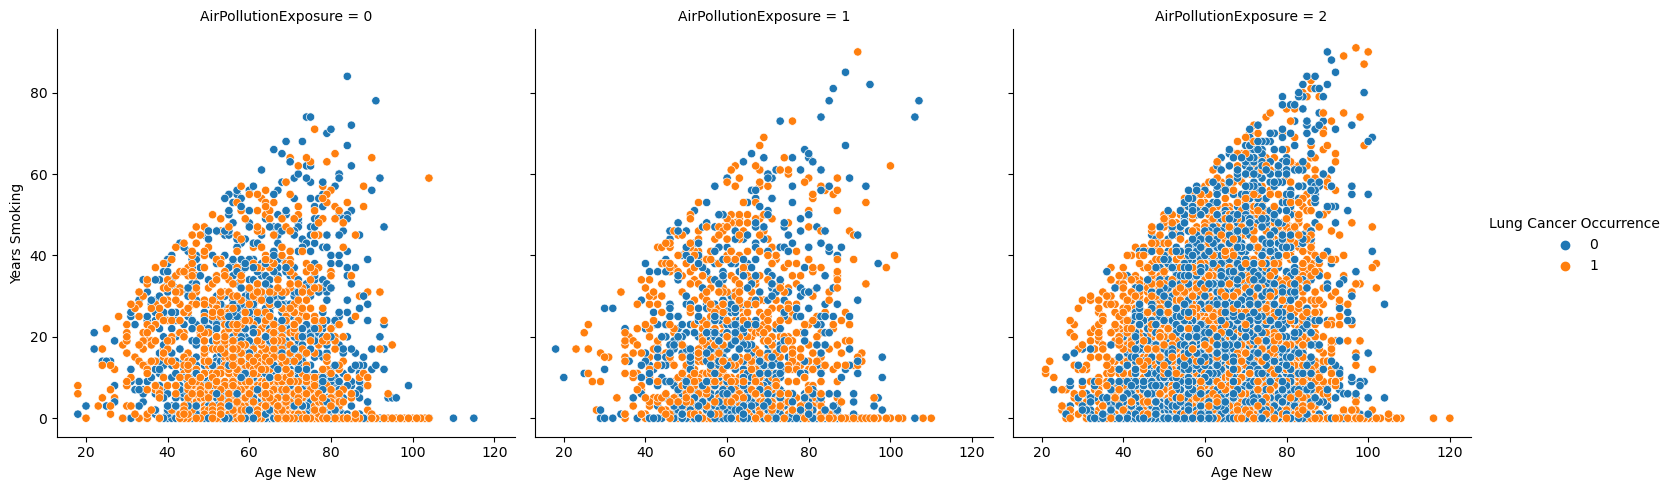

In [237]:
# Scatter plot 
sns.relplot(x = 'Age New', y = 'Years Smoking', data = df_clean, 
            kind = 'scatter', hue = 'Lung Cancer Occurrence', col = 
           'AirPollutionExposure')
plt.show()

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


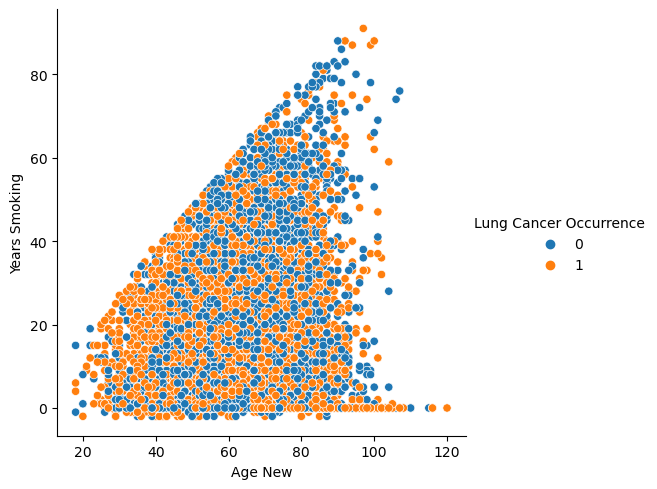

In [208]:
# Scatter plot 
sns.relplot(x = 'Age New', y = 'Years Smoking', data = df_clean, 
            kind = 'scatter', hue = 'Lung Cancer Occurrence')
plt.show()